1. Create the following data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.
Apply the Logistic Regression to perform the following.
a. Calculate the coefficients (B0, B1 and B2).
b. Apply the sigmoid function to get the prediction and calculate error.
c. From the predicted values calculate the accuracy.
d. List the model parameters along with error for every instance of the training data.
e. Plot the graph of B1 v/s error and B2 v/s error.
f. Use scikit learn model to repeat the above steps and compare the results.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('log_data.csv')
data

,X1,X2,Y
0,2.278108,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242070,1
9,7.673756,3.508563,1


In [23]:
x1 = data.iloc[:,:-2]
x2 = data.iloc[:,-2:-1]
y = data.iloc[:,-1]

npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)

In [24]:
# sigmoid function
def sigmoid(x):
    return (1/(1+ np.exp(-x)))

In [30]:
learning_rate = 0.3
epochs = 20
b0,b1,b2 = 0,0,0
accuracy, b0s, b1s, b2s, errors = [], [], [], [], []

for epoch in range(epochs):
    correct = 0
    for i in range(len(x1)):
        output = b0 + b1 * npx1[i] + b2 * npx2[i]
        pred = sigmoid(output)
        diff = npy[i] - pred
        
        # Update coefficients using gradient descent
        b0 = b0 + learning_rate * diff * pred * (1 - pred)
        b1 = b1 + learning_rate * diff * pred * (1 - pred) * npx1[i]
        b2 = b2 + learning_rate * diff * pred * (1 - pred) * npx2[i]

        if (pred < 0.5 and npy[i] == 0) or (pred >= 0.5 and npy[i] == 1):
            correct += 1

    accuracy.append(correct / len(x1))
    b0s.append(b0)
    b1s.append(b1)
    b2s.append(b2)
    errors.append(diff)
    
    print("After epoch", epoch + 1, ": b0 =", b0, "b1 =", b1, "b2 =", b2, " Error =", diff)


After epoch 1 : b0 = [-0.02008436] b1 = [0.3391161] b2 = [-0.09028359]  Error = [0.12027886]
After epoch 2 : b0 = [-0.09530846] b1 = [0.47082632] b2 = [-0.30408059]  Error = [0.09260059]
After epoch 3 : b0 = [-0.16079908] b1 = [0.58600308] b2 = [-0.47878545]  Error = [0.07235943]
After epoch 4 : b0 = [-0.22182417] b1 = [0.64289944] b2 = [-0.6403862]  Error = [0.09096869]
After epoch 5 : b0 = [-0.26890129] b1 = [0.68982684] b2 = [-0.76359238]  Error = [0.10664344]
After epoch 6 : b0 = [-0.30600462] b1 = [0.73251431] b2 = [-0.8601235]  Error = [0.11444534]
After epoch 7 : b0 = [-0.33668214] b1 = [0.77055112] b2 = [-0.93957056]  Error = [0.11757654]
After epoch 8 : b0 = [-0.36286256] b1 = [0.80446937] b2 = [-1.00702678]  Error = [0.11805155]
After epoch 9 : b0 = [-0.38570246] b1 = [0.83492696] b2 = [-1.06555857]  Error = [0.11703776]
After epoch 10 : b0 = [-0.40595348] b1 = [0.86250583] b2 = [-1.11718007]  Error = [0.11520122]
After epoch 11 : b0 = [-0.42413555] b1 = [0.88767795] b2 = [-1

Equation: y = [-0.53547227] + [1.04898306] *x1 [-1.44126036] *x2
Predicted values:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


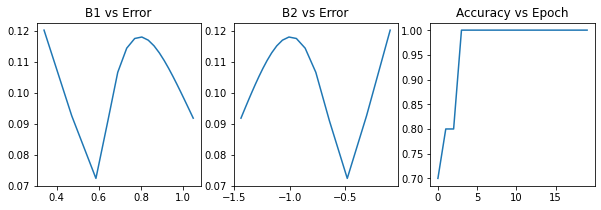

In [17]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
plt.plot(b1s,errors),plt.title("B1 vs Error")
plt.subplot(1,3,2)
plt.plot(b2s,errors),plt.title("B2 vs Error")

plt.subplot(1,3,3)
plt.plot(np.arange(20),accuracy)
plt.title("Accuracy vs Epoch")

print("Equation: y =",b0,"+",b1,"*x1",b2,"*x2")
npy = b0 + b1*npx1 + b2*npx2
output = sigmoid(npy)
func = lambda x: 0 if x<0.5 else 1
prediction = list(map(func,output))
print("Predicted values: ",prediction)

In [34]:
#Using scikit-learn model
from sklearn.linear_model import LogisticRegression
xs = data.iloc[:,:-1]
y = data.iloc[:,-1]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.coef_,clf.intercept_)

[[ 1.17111403 -0.36563671]] [-4.40586694]


2. Use above data set for one independent variable (X=X1) and one dependent variable (Y) in CSV.
Applying Logistic Regression, explore the relationship between independent and dependent variables.
a. Calculate the coefficients (B0, and B1).
b. Apply the sigmoid function to get the prediction and calculate error.
c. From the predicted values calculate the accuracy.
d. List the model parameters along with error for every instance of the training data.
e. Plot the graph of B1 v/s error.
f. Visualize the following binary cross entropy function for logistic regression using the above training data
Plot y=1 and y=0 cases separately, and then plot the combined graph by considering X in X-axis and cost in
Y-axis.
g. Use scikit learn model to repeat the above steps and compare the results.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("log_data.csv")
x = tab.iloc[:,:-2]
y = tab.iloc[:,-1]
npx = np.array(x)
npy = np.array(y

In [40]:
# sigmoid function
def sigmoid(x):
    return (1/(1+ np.exp(-x)))

In [41]:
b0, b1 = 0,0
learning_rate = 0.3
epochs = 10

b0s, b1s, accuracy, errors = [], [], [], []

for epoch in range(epochs):
    correct = 0
    for i in range(len(y)):
        output = b0 + b1 * npx[i] 
        pred = sigmoid(output)
        diff = npy[i] - pred
        # Update coefficients using gradient descent
        b0 = b0 + learning_rate * diff * pred * (1 - pred)
        b1 = b1 + learning_rate * diff * pred * (1 - pred) * npx[i]
        if (pred < 0.5 and npy[i] == 0) or (pred >= 0.5 and npy[i] == 1):
            correct += 1
    accuracy.append(correct / len(x1))
    b0s.append(b0)
    b1s.append(b1)
    errors.append(diff)
    print('After epoch ', epoch+1, ': b0 = ',b0,' , b1 = ', b1, ' , error = ', diff)

After epoch  1 : b0 =  [-0.04574902]  , b1 =  [0.31209379]  , error =  [0.10121973]
After epoch  2 : b0 =  [-0.16839252]  , b1 =  [0.34818525]  , error =  [0.08417622]
After epoch  3 : b0 =  [-0.29167241]  , b1 =  [0.37304243]  , error =  [0.07796951]
After epoch  4 : b0 =  [-0.41248832]  , b1 =  [0.3964927]  , error =  [0.07301172]
After epoch  5 : b0 =  [-0.53031413]  , b1 =  [0.41971259]  , error =  [0.06835392]
After epoch  6 : b0 =  [-0.64503057]  , b1 =  [0.44245377]  , error =  [0.06409311]
After epoch  7 : b0 =  [-0.75658207]  , b1 =  [0.46417116]  , error =  [0.06044443]
After epoch  8 : b0 =  [-0.86488767]  , b1 =  [0.48439596]  , error =  [0.05752939]
After epoch  9 : b0 =  [-0.96982502]  , b1 =  [0.50291815]  , error =  [0.05533186]
After epoch  10 : b0 =  [-1.07125862]  , b1 =  [0.51979009]  , error =  [0.0537385]


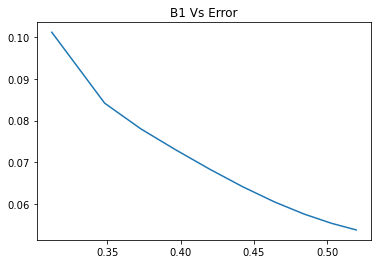

In [50]:
plt.plot(b1s, errors)
plt.title('B1 Vs Error')
plt.show()

/tmp/ipykernel_5588/1855139632.py:5: RuntimeWarning: divide by zero encountered in log
  y = -np.log(1-x)


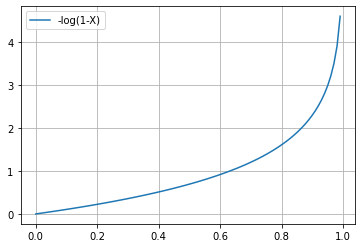

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
y = -np.log(1-x)
plt.plot(x,y, label="-log(1-X)")
plt.grid()
plt.legend()
plt.show()

/tmp/ipykernel_5588/955925076.py:2: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


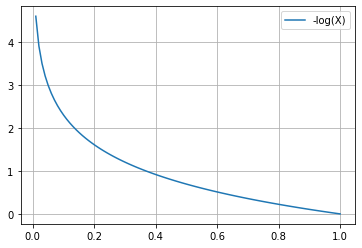

In [53]:
x = np.linspace(0,1,100)
y = -np.log(x)
plt.plot(x,y, label="-log(X)")
plt.grid()
plt.legend()
plt.show()

/tmp/ipykernel_5588/4109377413.py:2: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)
/tmp/ipykernel_5588/4109377413.py:3: RuntimeWarning: divide by zero encountered in log
  z = -np.log(1-x)


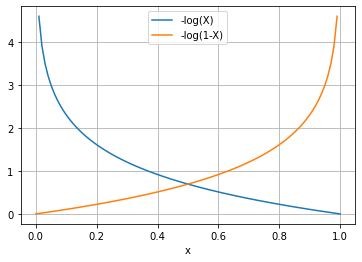

(Text(0.5, 17.200000000000003, 'x'),
 None,
 None)

In [54]:
x = np.linspace(0,1,100)
y = -np.log(x)
z = -np.log(1-x)
plt.plot(x,y,label="-log(X)")
plt.plot(x,z,label="-log(1-X)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

In [57]:
#Using scikit-learn model
from sklearn.linear_model import LogisticRegression
X = tab.iloc[:,:-2]
y = tab.iloc[:,-1]
clf = LogisticRegression(random_state=2).fit(X, y)
print(clf.coef_,clf.intercept_)

[[1.21297097]] [-5.60614018]


3. Use the above data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.
Apply the Logistic Regression with SGD to perform the following.
a. Calculate the coefficients (B0, B1 and B2) and arrive at different values of B0, B1, B2, and error for 50
iterations of 5 epochs.
b. Apply the sigmoid function to get the prediction and calculate error.
c. From the predicted values calculate the accuracy.
d. Plot the graph of epoch (X-axis) v/s Accuracy (Y-axis).
f. Use scikit learn model to repeat the above steps and compare the results.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('log_data.csv')
x1 = data.iloc[:,:-2]
x2 = data.iloc[:,-2:-1]
y = data.iloc[:,-1]

npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)

# sigmoid function
def sigmoid(x):
    return (1/(1+ np.exp(-x)))

learning_rate = 0.3
epochs = 5
b0,b1,b2 = 0,0,0
accuracy, b0s, b1s, b2s, errors = [], [], [], [], []

for epoch in range(epochs):
    correct = 0
    for i in range(len(x1)):
        output = b0 + b1 * npx1[i] + b2 * npx2[i]
        pred = sigmoid(output)
        diff = npy[i] - pred
        
        # Update coefficients using gradient descent
        b0 = b0 + learning_rate * diff * pred * (1 - pred)
        b1 = b1 + learning_rate * diff * pred * (1 - pred) * npx1[i]
        b2 = b2 + learning_rate * diff * pred * (1 - pred) * npx2[i]

        if (pred < 0.5 and npy[i] == 0) or (pred >= 0.5 and npy[i] == 1):
            correct += 1

    accuracy.append(correct / len(x1))
    b0s.append(b0)
    b1s.append(b1)
    b2s.append(b2)
    errors.append(diff)
    
    print("After epoch", epoch + 1, ": b0 =", b0, "b1 =", b1, "b2 =", b2, " Error =", diff)


After epoch 1 : b0 = [-0.02008436] b1 = [0.3391161] b2 = [-0.09028359]  Error = [0.12027886]
After epoch 2 : b0 = [-0.09530846] b1 = [0.47082632] b2 = [-0.30408059]  Error = [0.09260059]
After epoch 3 : b0 = [-0.16079908] b1 = [0.58600308] b2 = [-0.47878545]  Error = [0.07235943]
After epoch 4 : b0 = [-0.22182417] b1 = [0.64289944] b2 = [-0.6403862]  Error = [0.09096869]
After epoch 5 : b0 = [-0.26890129] b1 = [0.68982684] b2 = [-0.76359238]  Error = [0.10664344]


Equation: y = [-0.26890129] + [0.68982684] *x1 [-0.76359238] *x2
Predicted values:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


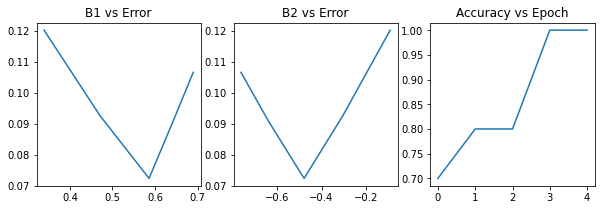

In [60]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
plt.plot(b1s,errors),plt.title("B1 vs Error")
plt.subplot(1,3,2)
plt.plot(b2s,errors),plt.title("B2 vs Error")

plt.subplot(1,3,3)
plt.plot(np.arange(5),accuracy)
plt.title("Accuracy vs Epoch")

print("Equation: y =",b0,"+",b1,"*x1",b2,"*x2")
npy = b0 + b1*npx1 + b2*npx2
output = sigmoid(npy)
func = lambda x: 0 if x<0.5 else 1
prediction = list(map(func,output))
print("Predicted values: ",prediction)

In [61]:
#Using scikit-learn model
from sklearn.linear_model import LogisticRegression
xs = data.iloc[:,:-1]
y = data.iloc[:,-1]
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.coef_,clf.intercept_)

[[1.21297097]] [-5.60614018]
